# Different visualizations for on Parking Tickets and Parking Meters

In [133]:
!pip install geopandas


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [134]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import LineString, Point, Polygon
from shapely import wkt, affinity

pd.set_option('display.width', 175)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_colwidth', None)

path = "../data/cleaned_data"

## Import Data

Import our cleaned and transformed data

In [135]:
def df_to_gdf(df: pd.DataFrame, geometry_key: str = "Geometry") -> gpd.GeoDataFrame:
    df[geometry_key] = df[geometry_key].apply(wkt.loads)
    return gpd.GeoDataFrame(df, geometry=geometry_key)

## Meters Data

In [136]:
meters_df = pd.read_csv(f"{path}/parking_meters.csv")
meters_df = df_to_gdf(meters_df)
meters_df.head()

,METERHEAD,R_MF_9A_6P,R_MF_6P_10,R_SA_9A_6P,R_SA_6P_10,R_SU_9A_6P,R_SU_6P_10,RATE_MISC,TIMEINEFFE,T_MF_9A_6P,T_MF_6P_10,T_SA_9A_6P,T_SA_6P_10,T_SU_9A_6P,T_SU_6P_10,TIME_MISC,Geo Local Area,METERID,Geometry
0,Twin,$1.00,$1.00,$1.00,$1.00,$1.00,$1.00,NaN,METER IN EFFECT: 9:00 AM TO 10:00 PM,2 Hr,4 Hr,2 Hr,4 Hr,2 Hr,4 Hr,NaN,Mount Pleasant,990002,POINT (49.264 -123.1)
1,Pay Station,$4.00,$4.00,$4.00,$4.00,$4.00,$4.00,NaN,METER IN EFFECT: 9:00 AM TO 10:00 PM,2 Hr,4 Hr,2 Hr,4 Hr,2 Hr,4 Hr,NaN,Grandview-Woodland,6C1306,POINT (49.273 -123.069)
2,Pay Station,$2.00,$2.00,$2.00,$2.00,$2.00,$2.00,NaN,METER IN EFFECT: 9:00 AM TO 10:00 PM,2 Hr,4 Hr,2 Hr,4 Hr,2 Hr,4 Hr,NaN,Kensington-Cedar Cottage,6C2619,POINT (49.261 -123.07)
3,Pay Station,$1.00,$2.00,$1.00,$2.00,$1.00,$2.00,$ .50,METER IN EFFECT: 9:00 AM TO 10:00 PM,2 Hr,4 Hr,2 Hr,4 Hr,2 Hr,4 Hr,NaN,Grandview-Woodland,6C2016,POINT (49.266 -123.07)
4,Pay Station,$1.00,$2.00,$1.00,$2.00,$1.00,$2.00,NaN,METER IN EFFECT: 9:00 AM TO 10:00 PM,2 Hr,4 Hr,2 Hr,4 Hr,2 Hr,4 Hr,NaN,Kensington-Cedar Cottage,6C2711,POINT (49.26 -123.07)


In [137]:
tickets_df = pd.read_csv(f"{path}/parking_tickets.csv")
tickets_df = df_to_gdf(tickets_df)
tickets_df.head()

,Block,Street,EntryDate,Status,Year,BI_ID,hour,dayofweek,Geometry,Neighbourhood
0,800,RICHARDS ST,2023-07-11,VA,2023,4546401,0,1,POINT (49.284 -123.112),Downtown
1,300,E 8TH AVE,2023-07-11,IS,2023,4546402,0,1,POINT (49.263 -123.086),Mount Pleasant
2,500,E 19TH AVE,2023-07-11,IS,2023,4546406,0,1,POINT (49.253 -123.046),Renfrew-Collingwood
3,500,E 17TH AVE,2023-07-11,IS,2023,4546408,0,1,POINT (49.255 -123.082),Kensington-Cedar Cottage
4,100,E 20TH AVE,2023-07-11,IS,2023,4546409,0,1,POINT (49.253 -123.074),Kensington-Cedar Cottage


In [138]:
boundaries_df = pd.read_csv(f"{path}/local_area_boundaries.csv")
boundaries_df = df_to_gdf(boundaries_df)
boundaries_df.head(3)

,Neighbourhood,Geometry
0,Downtown,"POLYGON ((49.29 -123.112, 49.288 -123.104, 49.289 -123.099, 49.273 -123.1, 49.273 -123.102, 49.273 -123.111, 49.272 -123.114, 49.27 -123.121, 49.27 -123.129, 49.275 -123.138, 49.277 -123.132, 49.284 -123.121, 49.294 -123.137, 49.296 -123.135, 49.292 -123.123, 49.29 -123.112))"
1,Hastings-Sunrise,"POLYGON ((49.293 -123.056, 49.294 -123.052, 49.294 -123.047, 49.293 -123.037, 49.294 -123.023, 49.293 -123.023, 49.266 -123.024, 49.265 -123.024, 49.265 -123.025, 49.265 -123.025, 49.265 -123.026, 49.265 -123.026, 49.264 -123.027, 49.264 -123.027, 49.264 -123.028, 49.264 -123.028, 49.263 -123.03, 49.263 -123.03, 49.262 -123.03, 49.262 -123.03, 49.262 -123.03, 49.262 -123.03, 49.262 -123.031, 49.262 -123.031, 49.262 -123.031, 49.262 -123.031, 49.262 -123.031, 49.262 -123.032, 49.262 -123.032, 49.262 -123.032, 49.262 -123.032, 49.262 -123.033, 49.262 -123.044, 49.262 -123.044, 49.262 -123.057, 49.262 -123.057, 49.293 -123.056))"
2,Kerrisdale,"POLYGON ((49.216 -123.179, 49.215 -123.176, 49.215 -123.172, 49.215 -123.172, 49.215 -123.171, 49.215 -123.17, 49.215 -123.17, 49.215 -123.169, 49.215 -123.169, 49.215 -123.168, 49.214 -123.168, 49.214 -123.167, 49.214 -123.167, 49.214 -123.166, 49.214 -123.165, 49.213 -123.165, 49.213 -123.164, 49.213 -123.164, 49.213 -123.163, 49.213 -123.163, 49.213 -123.162, 49.212 -123.162, 49.212 -123.161, 49.212 -123.161, 49.212 -123.16, 49.212 -123.16, 49.211 -123.159, 49.211 -123.159, 49.211 -123.159, 49.211 -123.158, 49.21 -123.158, 49.21 -123.158, 49.21 -123.158, 49.21 -123.158, 49.21 -123.157, 49.21 -123.157, 49.21 -123.157, 49.21 -123.157, 49.21 -123.157, 49.21 -123.157, 49.21 -123.157, 49.209 -123.157, 49.209 -123.157, 49.209 -123.157, 49.209 -123.157, 49.209 -123.157, 49.209 -123.157, 49.209 -123.156, 49.209 -123.156, 49.209 -123.156, 49.209 -123.156, 49.209 -123.156, 49.209 -123.156, 49.209 -123.156, 49.209 -123.156, 49.209 -123.156, 49.209 -123.156, 49.209 -123.156, 49.209 -123.156, 49.209 -123.156, 49.209 -123.155, 49.209 -123.155, 49.209 -123.155, 49.209 -123.155, 49.209 -123.155, 49.207 -123.153, 49.207 -123.153, 49.207 -123.153, 49.207 -123.153, 49.207 -123.153, 49.207 -123.153, 49.207 -123.153, 49.207 -123.152, 49.206 -123.152, 49.206 -123.152, 49.206 -123.152, 49.206 -123.152, 49.206 -123.152, 49.206 -123.152, 49.206 -123.152, 49.206 -123.152, 49.206 -123.152, 49.206 -123.152, 49.206 -123.152, 49.206 -123.152, 49.206 -123.152, 49.205 -123.152, 49.205 -123.152, 49.205 -123.152, 49.205 -123.151, 49.205 -123.151, 49.205 -123.15, 49.209 -123.149, 49.209 -123.148, 49.209 -123.149, 49.219 -123.148, 49.219 -123.14, 49.234 -123.14, 49.235 -123.155, 49.235 -123.17, 49.235 -123.179, 49.216 -123.179))"


In [139]:
exterior_boundaries = boundaries_df.copy()
exterior_boundaries["Geometry"] = exterior_boundaries["Geometry"].apply(
    lambda geom: LineString([(y, x) for x, y in geom.exterior.coords])
)

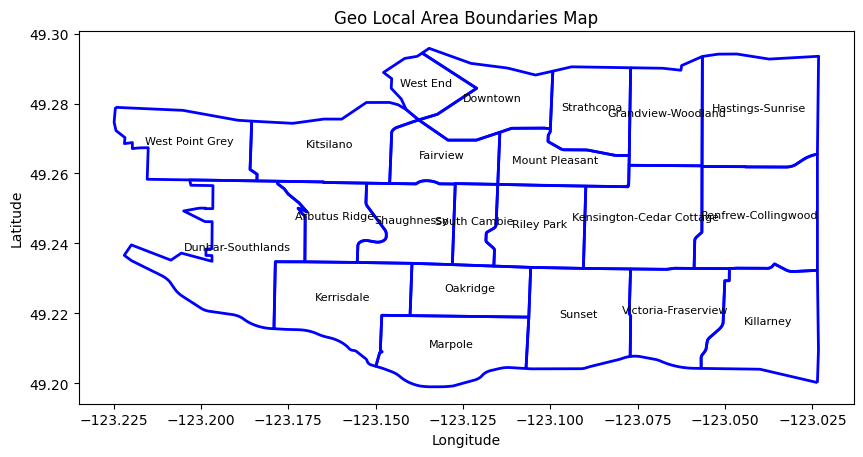

In [140]:
fig, ax = plt.subplots(figsize=(10, 10))
exterior_boundaries.plot(ax=ax, color='blue', linewidth=2)

for idx, row in boundaries_df.iterrows():
    if not row['Geometry'].is_empty:
        centroid = row['Geometry'].centroid
        ax.annotate(
            row['Neighbourhood'],
            xy=(centroid.y, centroid.x),
            fontsize=8,
            ha='center',
            color='black'
        )

ax.set_title("Geo Local Area Boundaries Map")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.show()

# Visualization of Boundaries and Parking Meter Locations

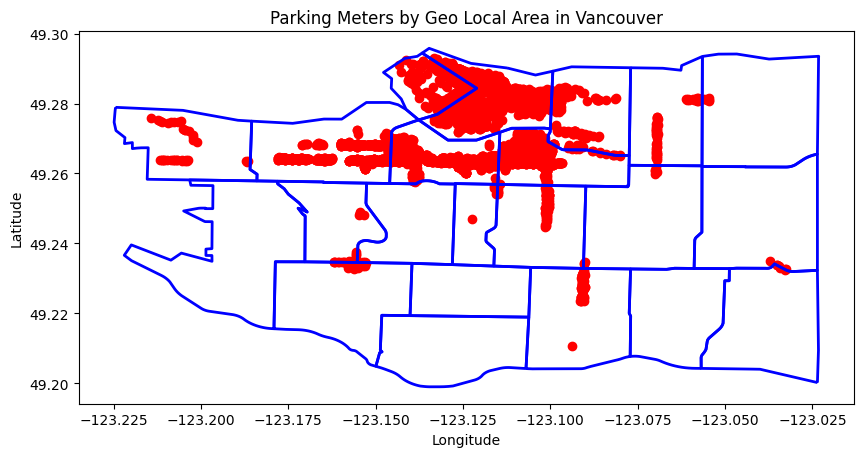

In [141]:

fig, ax = plt.subplots(figsize=(10, 10))

exterior_boundaries.plot(ax=ax, color='blue', linewidth=2)

meters = meters_df.copy()
meters["Geometry"] = meters["Geometry"].apply(lambda pt: Point(pt.y, pt.x))

meters.plot(ax=ax, color='red', linewidth=1)

ax.set_title("Parking Meters by Geo Local Area in Vancouver")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.show()

# Visualization of Boundaries and Parking Ticket Locations

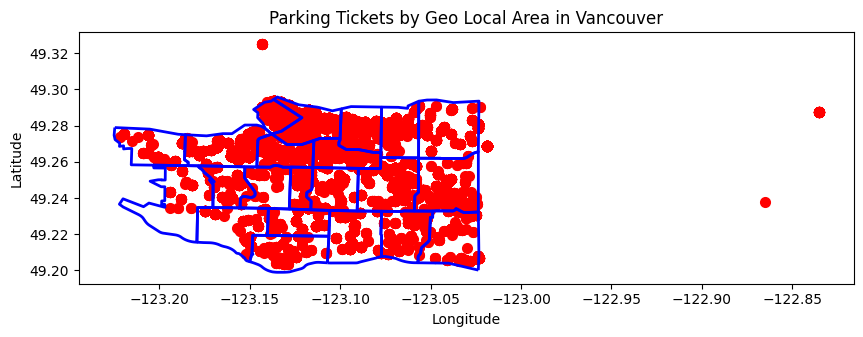

In [142]:
fig, ax = plt.subplots(figsize=(10, 10))

exterior_boundaries.plot(ax=ax, color='blue', linewidth=2)

tickets = tickets_df.copy()
tickets["Geometry"] = tickets["Geometry"].apply(lambda pt: Point(pt.y, pt.x))

tickets.plot(ax=ax, color='red', linewidth=2)

ax.set_title("Parking Tickets by Geo Local Area in Vancouver")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.show()

# General Frequency Visualizations

* Amount of tickets per neighbourhood 


In [143]:
grouped_tickets_df = tickets.groupby("Neighbourhood").size().reset_index(name="TicketCount")

In [144]:
# largest_neighbourhood with tickets
grouped_tickets_df.sort_values("TicketCount", ascending=False).iloc[0]

Neighbourhood    Downtown
TicketCount         11556
Name: 1, dtype: object

In [145]:
neighbourhoods_df = boundaries_df.merge(grouped_tickets_df, left_on="Neighbourhood", right_on="Neighbourhood", how="outer")
neighbourhoods_df["TicketCount"] = neighbourhoods_df["TicketCount"].fillna(0)
neighbourhoods_df.head(2)

,Neighbourhood,Geometry,TicketCount
0,Arbutus Ridge,"POLYGON ((49.257 -123.153, 49.257 -123.165, 49.258 -123.165, 49.258 -123.178, 49.257 -123.178, 49.257 -123.178, 49.256 -123.176, 49.254 -123.175, 49.252 -123.172, 49.249 -123.17, 49.25 -123.171, 49.25 -123.172, 49.248 -123.171, 49.248 -123.171, 49.248 -123.17, 49.235 -123.17, 49.235 -123.155, 49.239 -123.155, 49.239 -123.155, 49.24 -123.155, 49.24 -123.155, 49.24 -123.155, 49.24 -123.155, 49.24 -123.155, 49.24 -123.155, 49.24 -123.155, 49.24 -123.155, 49.24 -123.155, 49.24 -123.155, 49.24 -123.154, 49.24 -123.154, 49.24 -123.154, 49.24 -123.154, 49.241 -123.154, 49.241 -123.154, 49.241 -123.154, 49.241 -123.154, 49.241 -123.154, 49.241 -123.153, 49.241 -123.153, 49.241 -123.153, 49.241 -123.153, 49.241 -123.153, 49.241 -123.153, 49.241 -123.153, 49.241 -123.153, 49.241 -123.152, 49.241 -123.152, 49.241 -123.152, 49.241 -123.152, 49.241 -123.152, 49.24 -123.15, 49.24 -123.15, 49.24 -123.15, 49.24 -123.15, 49.24 -123.15, 49.24 -123.149, 49.24 -123.149, 49.24 -123.149, 49.24 -123.149, 49.24 -123.149, 49.24 -123.149, 49.24 -123.149, 49.24 -123.149, 49.24 -123.148, 49.241 -123.148, 49.241 -123.148, 49.241 -123.148, 49.241 -123.148, 49.241 -123.148, 49.241 -123.148, 49.241 -123.148, 49.241 -123.148, 49.241 -123.148, 49.241 -123.147, 49.241 -123.147, 49.241 -123.147, 49.241 -123.147, 49.241 -123.147, 49.241 -123.147, 49.241 -123.147, 49.242 -123.147, 49.242 -123.147, 49.242 -123.147, 49.242 -123.147, 49.242 -123.147, 49.242 -123.147, 49.243 -123.147, 49.243 -123.147, 49.243 -123.147, 49.243 -123.147, 49.243 -123.147, 49.243 -123.147, 49.244 -123.147, 49.244 -123.147, 49.244 -123.147, 49.251 -123.152, 49.251 -123.152, 49.251 -123.153, 49.251 -123.153, 49.251 -123.153, 49.251 -123.153, 49.251 -123.153, 49.252 -123.153, 49.252 -123.153, 49.252 -123.153, 49.257 -123.153))",550
1,Downtown,"POLYGON ((49.29 -123.112, 49.288 -123.104, 49.289 -123.099, 49.273 -123.1, 49.273 -123.102, 49.273 -123.111, 49.272 -123.114, 49.27 -123.121, 49.27 -123.129, 49.275 -123.138, 49.277 -123.132, 49.284 -123.121, 49.294 -123.137, 49.296 -123.135, 49.292 -123.123, 49.29 -123.112))",11556


## Tickets Per Neighbourhood

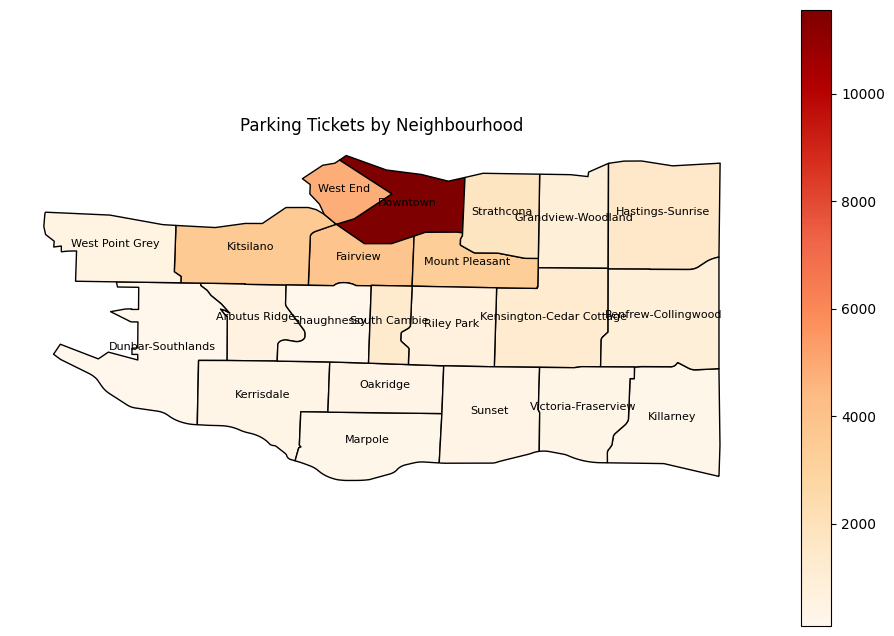

In [146]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

neighbourhoods = neighbourhoods_df.copy()
neighbourhoods["Geometry"] = neighbourhoods["Geometry"].apply(
    lambda geom: Polygon([(y, x) for x, y in geom.exterior.coords])
)

neighbourhoods.plot(column="TicketCount", cmap="OrRd", legend=True, ax=ax, edgecolor="black")
for idx, row in neighbourhoods.iterrows():
    if not row['Geometry'].is_empty:
        centroid = row['Geometry'].centroid
        
        ax.annotate(
            row['Neighbourhood'],
            xy=(centroid.x, centroid.y),
            fontsize=8,
            ha='center',
            color='black'
        )
ax.set_title("Parking Tickets by Neighbourhood")
ax.axis('off')
plt.show()

# Visualization of X Neighbourhood
* tickets per hour
* tickets per day
* tickets per street in the neighbourhood